# Character Statistics
---

### Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

### Settings

In [14]:
pd.options.mode.copy_on_write = True
plt.style.use('dark_background')
# plt.style.use('default')
plt.style.use('classic')
# plt.style.use('ggplot')
# plt.style.use('bmh')
# plt.style.use('seaborn-v0_8')

### .csv formatting

In [15]:
# # Open csv
# with open("data/pidas.csv", "r") as file: 
#     reader = csv.reader(file) 
    
#     with open("pidas-statistics.csv", "w") as result: 
#         writer = csv.writer(result) 
        
#         # Remove rows & columns
#         i = 0
#         for row in reader:
#             if i != 0 and i != 1 and  i !=2:
#                 writer.writerow(row[1:])
   
#             # Rename Alignment columns         
#             if i == 1:
#                 row[5] = "Align_Law"
#                 row[6] = "Align_Moral"
#                 writer.writerow(row[1:])
            
#             i += 1
        

In [16]:
# maria_data = pd.read_csv("maria-statistics.csv")
# marios_data = pd.read_csv("marios-statistics.csv")
# pidas_data = pd.read_csv("pidas-statistics.csv")

Add columns: Player_Gender, (Player_Age, Player_Experience)

In [17]:
# maria_data["player_gender"] = ["Female"]*len(maria_data)
# # maria_data["player_age"] = [22]*len(maria_data)
# # maria_data["player_experience"] = []
# maria_data = maria_data.dropna(subset=["Name"])

# marios_data["player_gender"] = ["Male"]*len(marios_data)
# # marios_data["player_age"] = []*len(marios_data)
# # marios_data["player_experience"] = []*len(marios_data)
# marios_data = marios_data.dropna(subset=["Name"])

# pidas_data["player_gender"] = ["Male"]*len(pidas_data)
# # pidas_data["player_age"] = []*len(pidas_data)
# # pidas_data["player_experience"] = []*len(pidas_data)
# pidas_data = pidas_data.dropna(subset=["Name"])

Concatinate dataframes

In [18]:
# data = pd.concat([maria_data, marios_data, pidas_data], axis=0)

In [19]:
# data.to_csv('data.csv', index=False)

In [20]:
# Make the dataframe
data = pd.read_csv("data.csv") # data is preprossesed already

### Data type transformation

In [21]:
# # Gold to float 
# data["Gold"] = data["Gold"].str.replace("g", "")
# data["Gold"] = data["Gold"].str.replace(".", "")
# data["Gold"] = data["Gold"].str.replace(",", ".")
# data["Gold"] = pd.to_numeric(data["Gold"])

In [22]:
# Fill NaN values
data[["Gold", "l2", "l3", "l4"]] = data[["Gold", "l2", "l3", "l4"]].fillna(0.0)
data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]] = data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]].fillna("No")
data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]] = data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]].fillna("None")
data[["Level", "l1"]] = data[["Level", "l1"]].fillna(1.0)
data.head()

,Name,Gender,Race,Size,Align_Law,Align_Moral,Age,Background,Relationships,Wellbeing,...,Multiclass 3,l4,ASI 1,ASI 2,ASI 3,ASI 4,ASI 5,ASI 6,ASI 7,player_gender
0,Apholia Brainir,Female,Aasimar,Medium,Lawful,Evil,31.0,Haunted One,Single,Alive,...,No,0.0,Ability Score Improvement,Mage Slayer,Shadow Touched,None,None,None,None,Female
1,Nuria Ember,Female,Shifter,Medium,Neutral,Good,40.0,Haunted One,Married,Alive,...,No,0.0,Ability Score Improvement,Ability Score Improvement,Ability Score Improvement,None,None,None,None,Female
2,Gorin of the Ironhill,Male,Dwarf,Medium,Lawful,Good,155.0,Clan Crafter,Single,Alive,...,No,0.0,Ability Score Improvement,None,None,None,None,None,None,Female
3,Shyorin Baenre,Female,Elf,Medium,Neutral,Good,22.0,Acolyte,In Relationship,Alive,...,No,0.0,Ability Score Improvement,War Caster,Ability Score Improvement,None,None,None,None,Female
4,Adam Scott,Male,Human,Medium,Neutral,Neutral,17.0,Spy,Single,Alive,...,No,0.0,Ability Score Improvement,None,None,None,None,None,None,Female


# First Look
---

## Numeric Data

In [23]:
data[["Age", "Gold", "Level"]].describe()

,Age,Gold,Level
count,61.000000,61.000000,61.000000
mean,65.819672,3092.808197,6.885246
std,94.814294,19206.394502,4.494806
min,16.000000,0.000000,1.000000
25%,22.000000,10.000000,3.000000
50%,33.000000,13.000000,5.000000
75%,50.000000,240.000000,9.000000
max,562.000000,150000.000000,18.000000


## Categorical Data (Personal)

In [24]:
data[["Gender", "Race", "Size", "Align_Law", "Align_Moral", "Background", "Relationships", "Wellbeing", "Status"]].describe()

,Gender,Race,Size,Align_Law,Align_Moral,Background,Relationships,Wellbeing,Status
count,61,61,61,61,61,61,61,61,61
unique,3,25,2,3,3,35,5,2,3
top,Male,Human,Medium,Neutral,Good,Haunted One,Single,Alive,Concept
freq,32,11,49,26,31,7,48,59,24


## Gender

Text(0.5, 1.0, 'Gender')

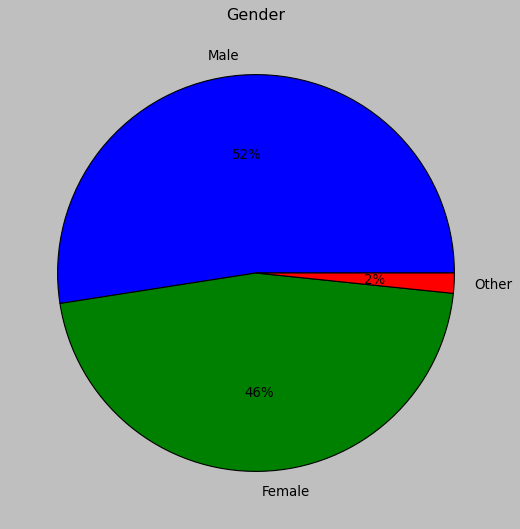

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

count = data.Gender.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Gender")

## Race & Size

Race with barplot better

Text(0.5, 1.0, 'Size')

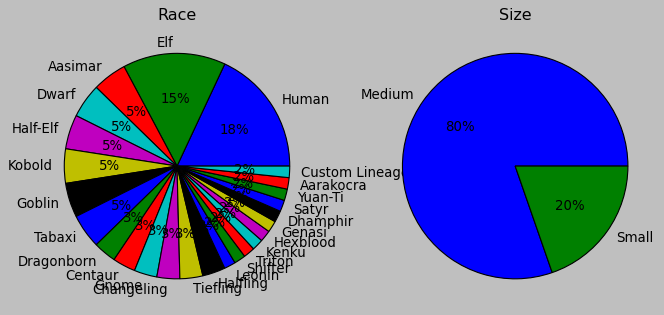

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

count = data.Race.value_counts(sort=True, normalize=True)
ax1.pie(count, labels=count.index, autopct='%1.0f%%')
ax1.set_title('Race')

count = data.Size.value_counts(sort=True, normalize=True)
ax2.pie(count, labels=count.index, autopct='%1.0f%%')
ax2.set_title('Size')

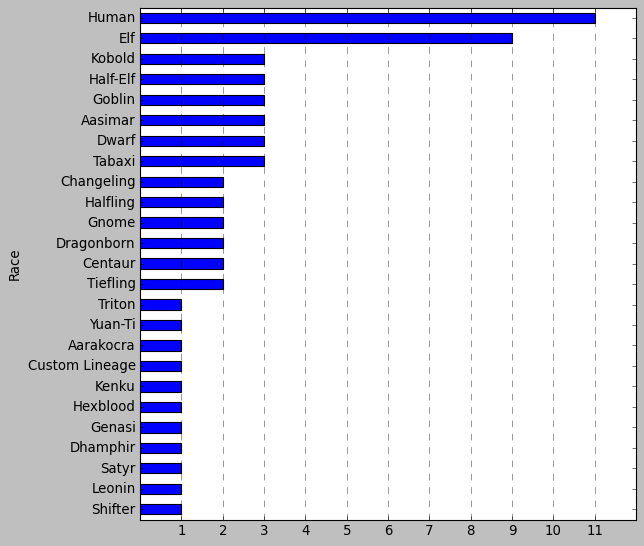

In [27]:
category_counts = data["Race"] .value_counts().sort_values(ascending=True)
plt.figure(figsize=(8,8))
category_counts.plot(kind='barh')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
#plt.xticks(rotation=45)

max_value = category_counts.max()
plt.xticks(range(1, max_value + 1))

plt.show()

## Alignment

Text(0.5, 1.0, 'Morality')

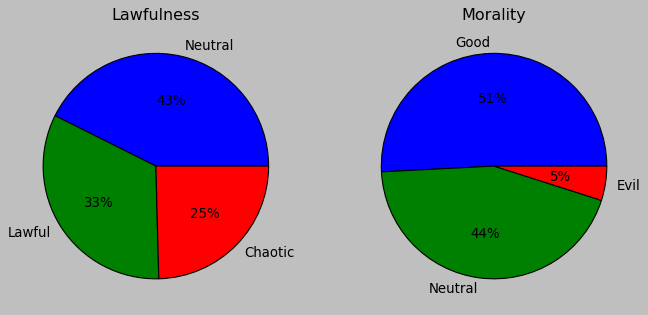

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

count = data.Align_Law.value_counts(sort=True, normalize=True)
ax1.pie(count, labels=count.index, autopct='%1.0f%%')
ax1.set_title('Lawfulness')

count = data.Align_Moral.value_counts(sort=True, normalize=True)
ax2.pie(count, labels=count.index, autopct='%1.0f%%')
ax2.set_title('Morality')

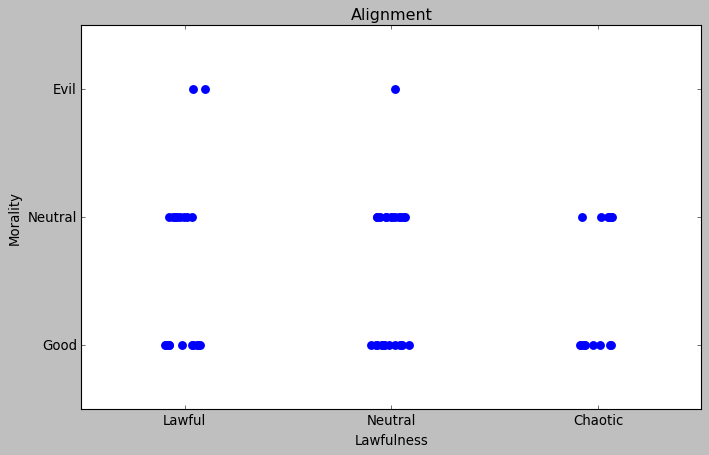

In [29]:
law_map = {"Lawful": 0, "Neutral": 1, "Chaotic": 2}
moral_map = {"Good": 0, "Neutral": 1, "Evil": 2}

alignment_mapped = data[["Align_Law", "Align_Moral"]]
alignment_mapped["Align_Law"] = alignment_mapped["Align_Law"].map(law_map)
alignment_mapped["Align_Moral"] = alignment_mapped["Align_Moral"].map(moral_map)

plt.figure(figsize=(10,6))
sns.stripplot(x="Align_Law", y="Align_Moral", data=alignment_mapped, jitter=True, size=8)

plt.xticks([0,1,2], ["Lawful", "Neutral", "Chaotic"])
plt.yticks([0,1,2], ["Good", "Neutral", "Evil"])

plt.xlabel("Lawfulness")
plt.ylabel("Morality")
plt.title("Alignment")
plt.show()  

## Background

Text(0.5, 1.0, 'Background')

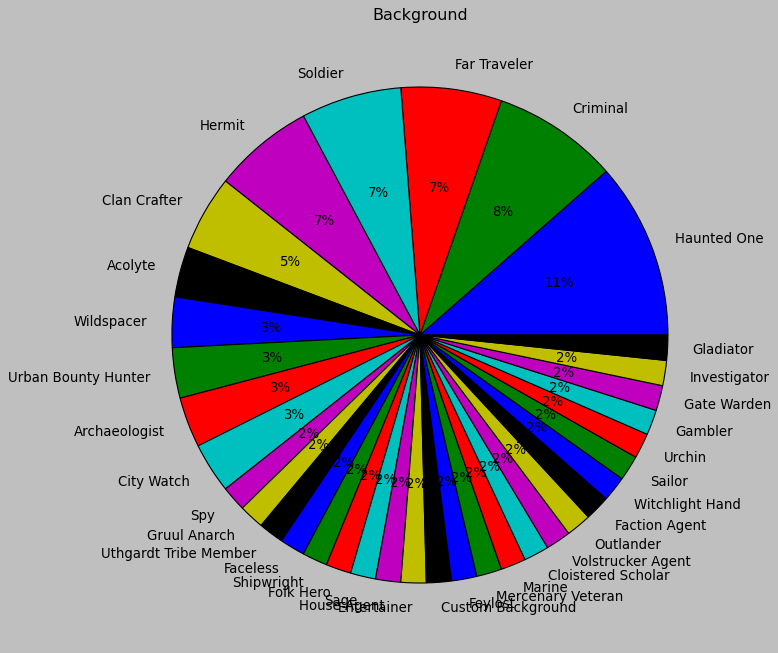

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

count = data.Background.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Background")

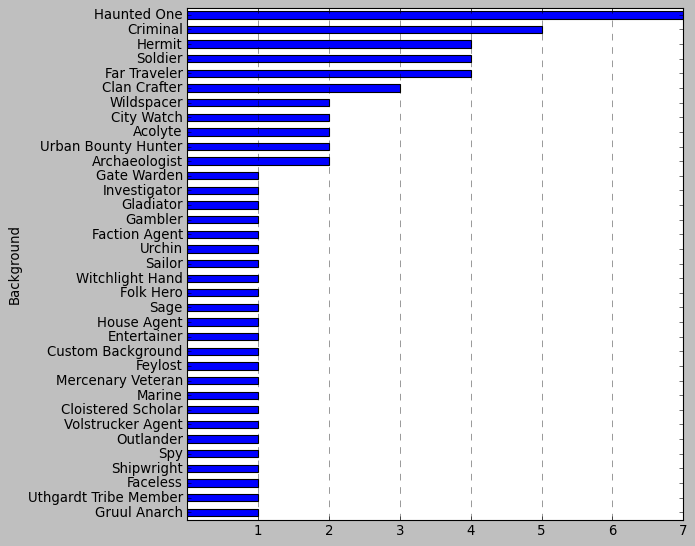

In [31]:
category_counts = data["Background"] .value_counts().sort_values(ascending=True)
plt.figure(figsize=(8,8))
category_counts.plot(kind='barh')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
#plt.xticks(rotation=45)

max_value = category_counts.max()
plt.xticks(range(1, max_value + 1))

plt.show()

## Relationships

Text(0.5, 1.0, 'Relationships')

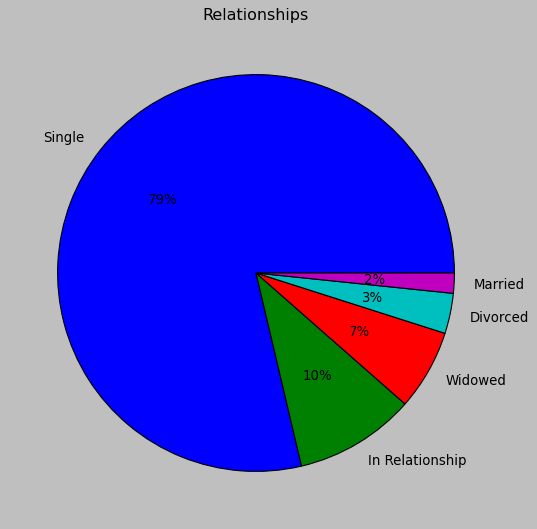

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

count = data.Relationships.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Relationships")

## Wellbeing

Text(0.5, 1.0, 'Wellbeing')

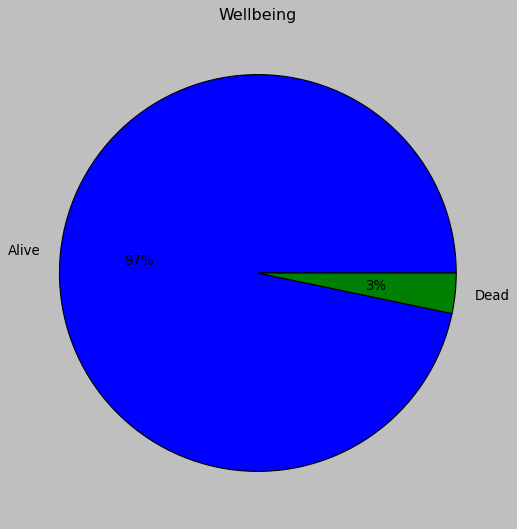

In [33]:
fig, ax = plt.subplots(figsize=(8,8))

count = data.Wellbeing.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Wellbeing")